###Project 2 dataset: 'https://www.kaggle.com/andrewmvd/fetal-health-classification'

Fetal Health Classification
Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

1 Normal
2 Suspect
3 Pathological

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)

1) Source of data

  Located on Kaggle, fetal health data originating from this research: 
  Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

2) Brief description of data

  2126 measurements extracted from cardiotocograms and classified by expert obstetricians.

  The data pertains to fetal viability in relation to heart rate, fetal movements, variability etc.

3) What is the target?

  The target is fetal_health:  
  Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

4) Is this a classification or regression problem?

  I believe this is a classification problem as these indicators will be clustered to predict the fetal health. 

5) How many features?

  21

6) How many rows of data.

  2126

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

  It is unclear to me the significance of the histogram columns. The kaggle introduction is somewhat limited but there is a decent amount of discussion in the forums that should help the process along.


In [224]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [225]:
filename = '/content/fetal_health.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [226]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [228]:
df.isnull().sum()

#No missing values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [229]:
df.duplicated().sum()



13

In [230]:
#13 Duplicated rows will be dropped

In [231]:
df.drop_duplicates(inplace = True)

In [232]:
df.duplicated().sum()

0

Removing unnecessary columns

In [233]:
df.drop(columns = ['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency' ], inplace = True)

In [234]:
df.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


### Produce univariate visualizations to explore the target and corresponding features / Checking for Outliers



In [235]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

Text(0.5, 1.0, 'Fetal Health Distribution')

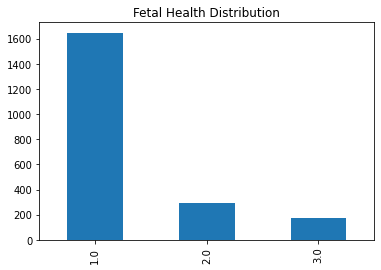

In [236]:
df['fetal_health'].value_counts().plot(kind='bar');
plt.title('Fetal Health Distribution')


Text(0.5, 1.0, 'Baseline Fetal Heart Rate FHR Distribution')

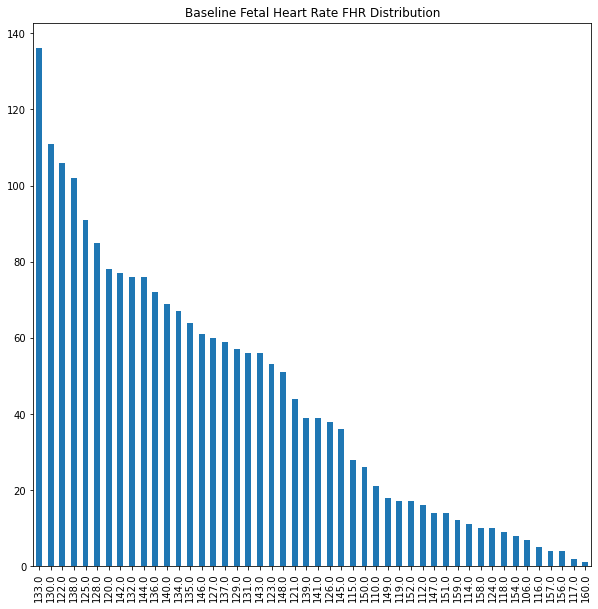

In [237]:
plt.figure(figsize=(10,10))
df['baseline value'].value_counts().plot(kind='bar');
plt.title('Baseline Fetal Heart Rate FHR Distribution')
#Baseline Fetal Heart Rate (FHR)

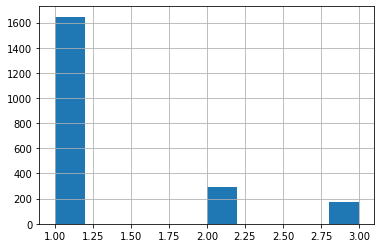

In [238]:
df['fetal_health'].hist();

Text(0.5, 1.0, 'Number of accelerations per second Distribution')

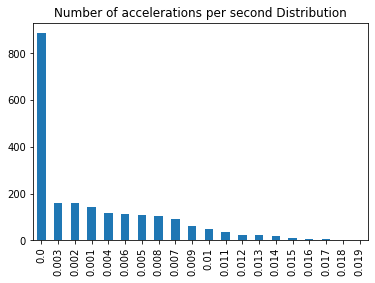

In [239]:
df['accelerations'].value_counts().plot(kind='bar');
plt.title('Number of accelerations per second Distribution')
#Number of accelerations per second

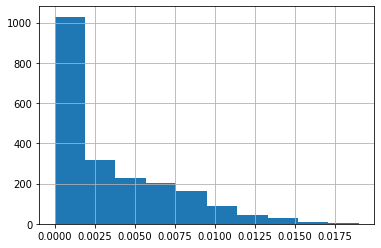

In [240]:
df['accelerations'].hist();

Text(0.5, 1.0, 'Number of fetal movements per second Distribution')

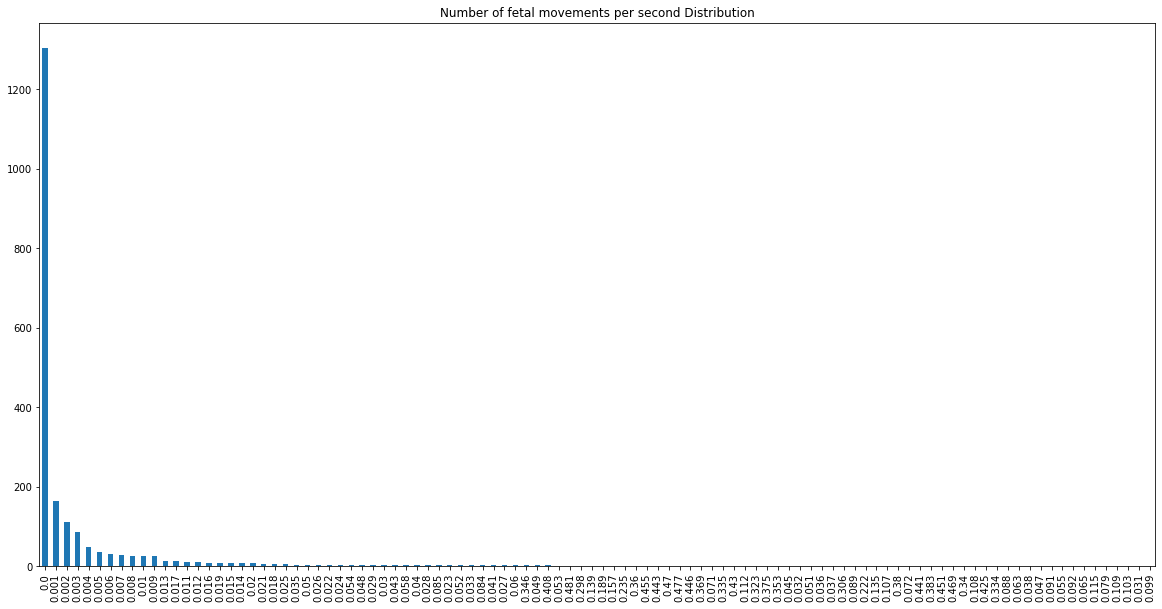

In [241]:
plt.figure(figsize=(20,10))

df['fetal_movement'].value_counts().plot(kind='bar');
plt.title('Number of fetal movements per second Distribution')
#Number of fetal movements per second

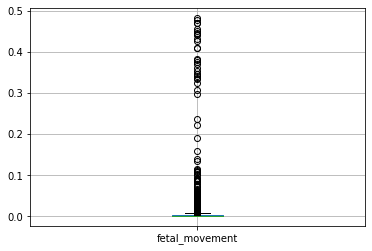

In [242]:
df.boxplot(column = 'fetal_movement');

Text(0.5, 1.0, 'Number of uterine contractions per second Distribution')

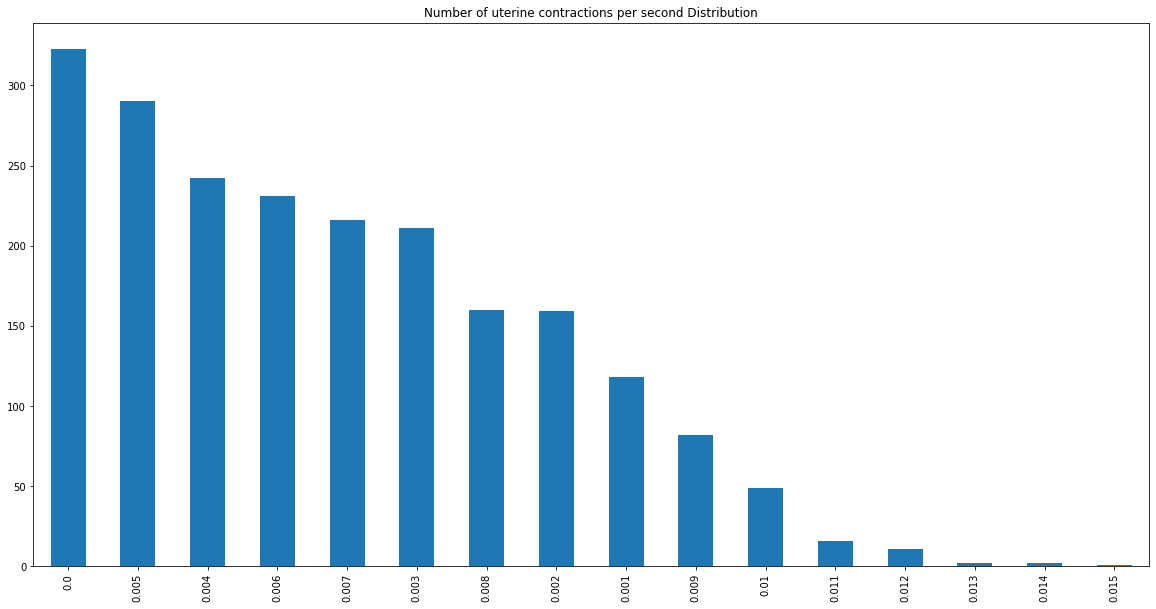

In [243]:
#Number of uterine contractions per second
plt.figure(figsize=(20,10))
df['uterine_contractions'].value_counts().plot(kind='bar');
plt.title('Number of uterine contractions per second Distribution')

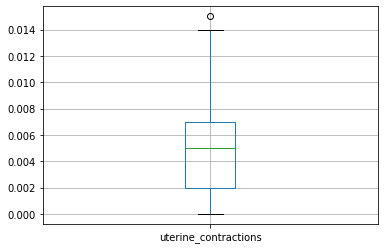

In [244]:
df.boxplot(column = 'uterine_contractions');

Text(0.5, 1.0, 'Number of LDs per second Distribution')

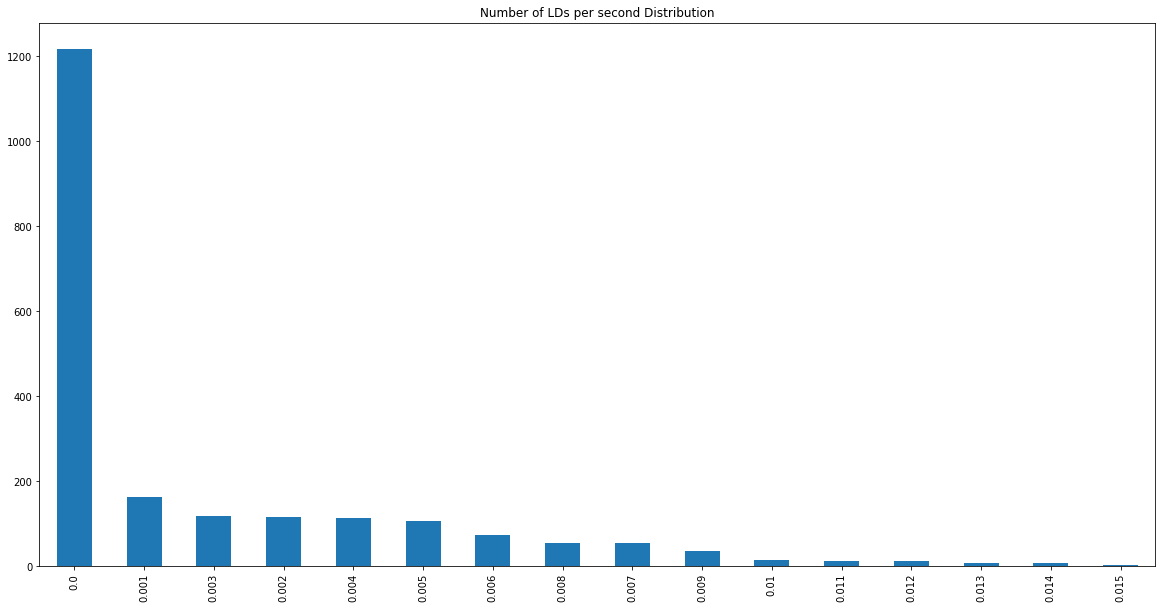

In [245]:
#Number of LDs per second
plt.figure(figsize=(20,10))
df['light_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of LDs per second Distribution')

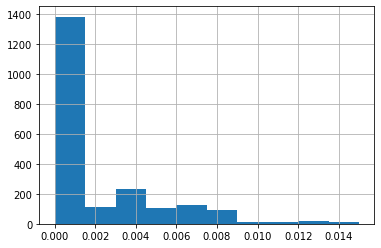

In [246]:
df['light_decelerations'].hist();

Text(0.5, 1.0, 'Number of SDs per second Distribution')

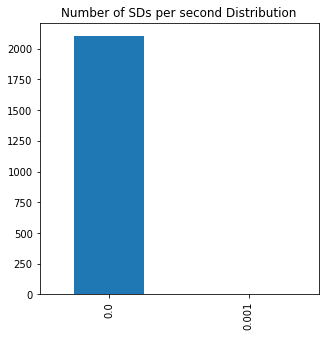

In [247]:
#Number of SDs per second
plt.figure(figsize=(5,5))
df['severe_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of SDs per second Distribution')

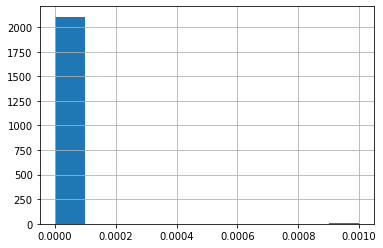

In [248]:
df['severe_decelerations'].hist();

Text(0.5, 1.0, 'Number of PDs per second Distribution')

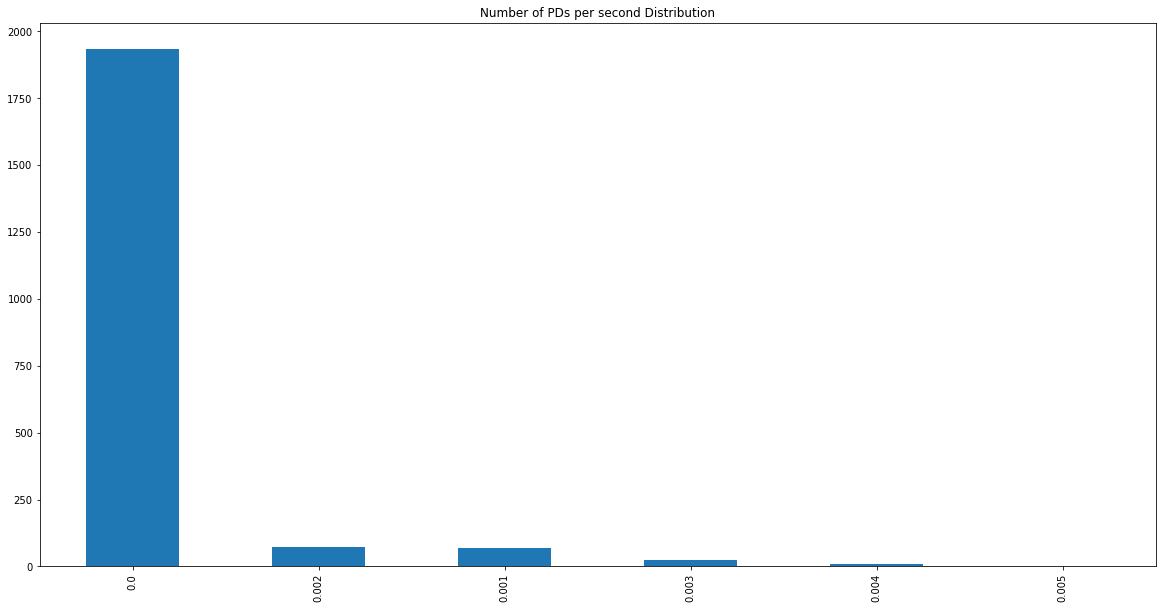

In [249]:
#Number of PDs per second
plt.figure(figsize=(20,10))
df['prolongued_decelerations'].value_counts().plot(kind='bar');
plt.title('Number of PDs per second Distribution')

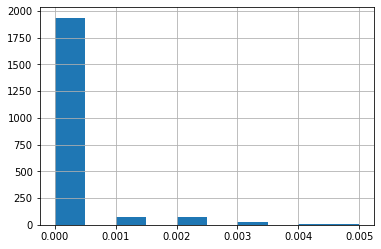

In [250]:
df['prolongued_decelerations'].hist();

Text(0.5, 1.0, 'Percentage of time with abnormal short term variability Distribution')

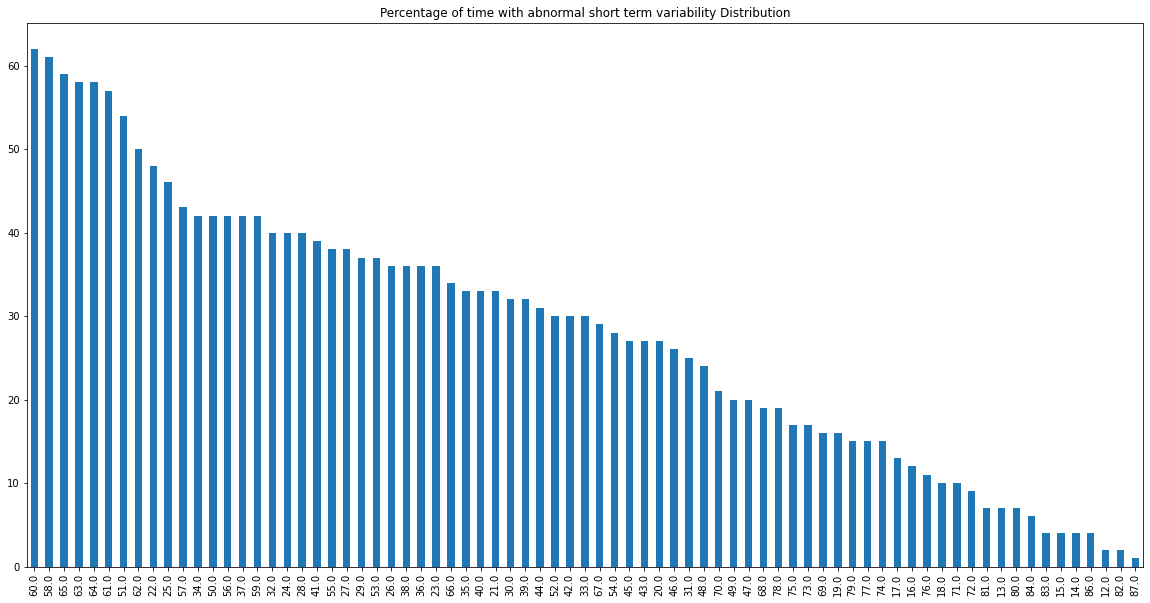

In [251]:
#Percentage of time with abnormal short term variability
plt.figure(figsize=(20,10))
df['abnormal_short_term_variability'].value_counts().plot(kind='bar');
plt.title('Percentage of time with abnormal short term variability Distribution')

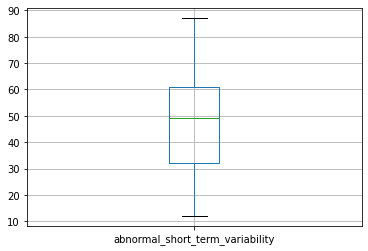

In [252]:
df.boxplot(column = 'abnormal_short_term_variability');

Text(0.5, 1.0, 'Mean value of short term variability Distribution')

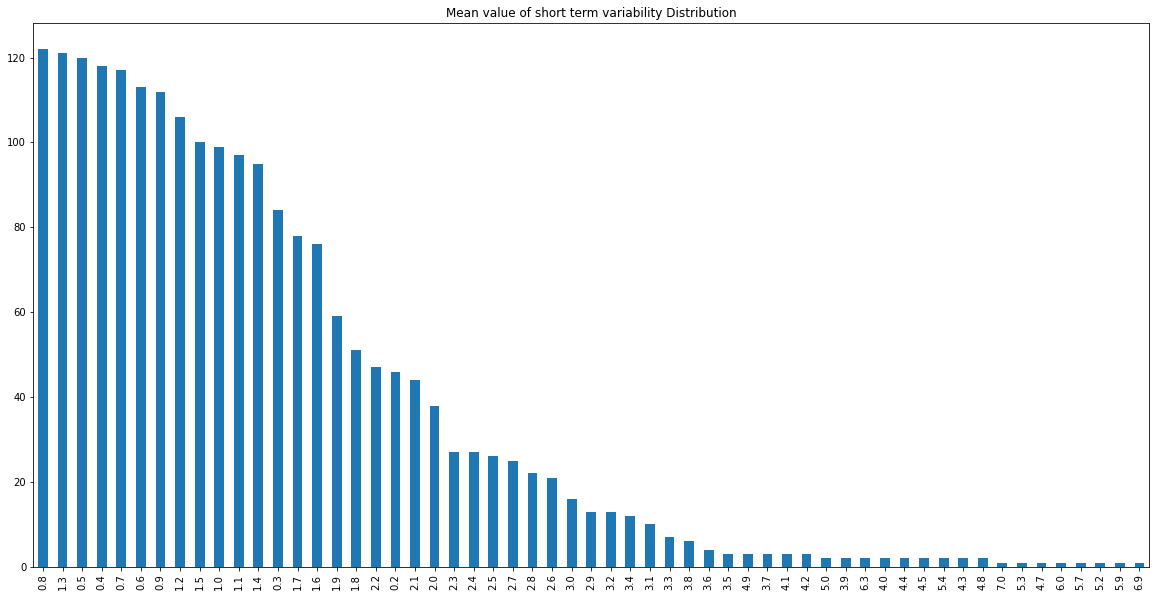

In [253]:
#Mean value of short term variability
plt.figure(figsize=(20,10))
df['mean_value_of_short_term_variability'].value_counts().plot(kind='bar');
plt.title('Mean value of short term variability Distribution')

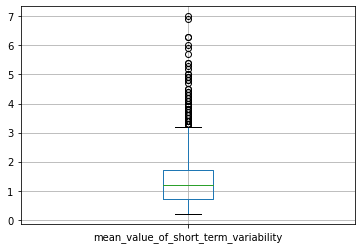

In [254]:
df.boxplot(column = 'mean_value_of_short_term_variability');


Text(0.5, 1.0, 'Percentage of time with abnormal long term variability Distribution')

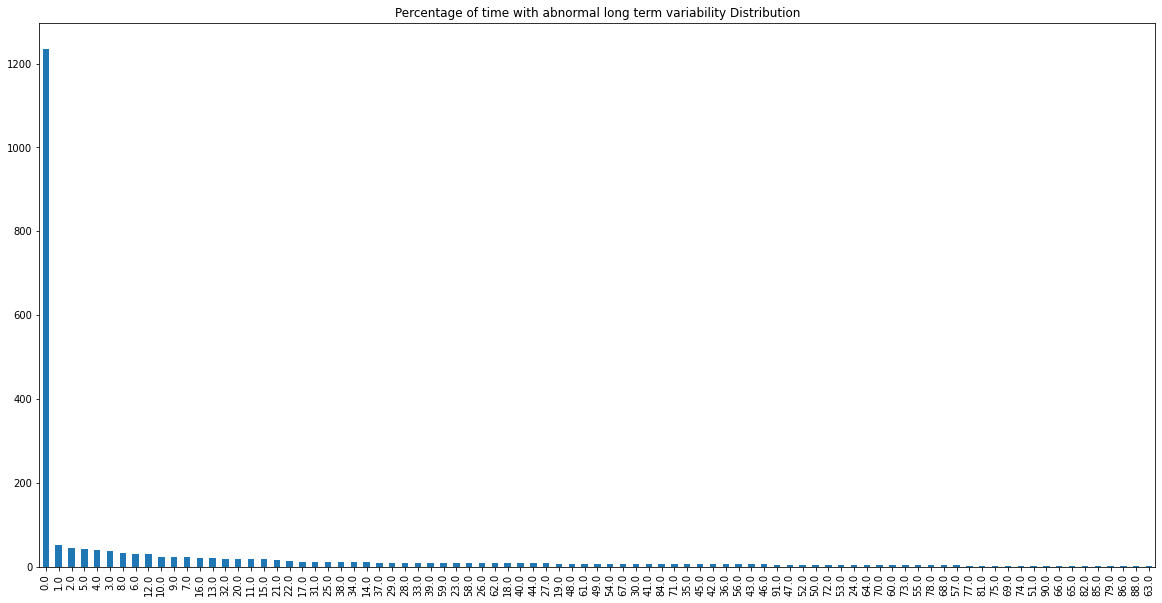

In [255]:
#Percentage of time with abnormal long term variability
plt.figure(figsize=(20,10))
df['percentage_of_time_with_abnormal_long_term_variability'].value_counts().plot(kind='bar');
plt.title('Percentage of time with abnormal long term variability Distribution')

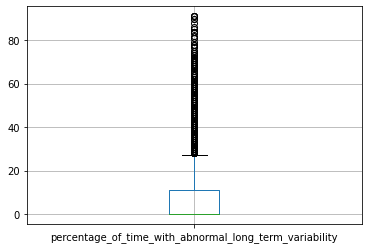

In [256]:
df.boxplot(column = 'percentage_of_time_with_abnormal_long_term_variability');

Text(0.5, 1.0, 'Mean Value of Long term variability Distribution')

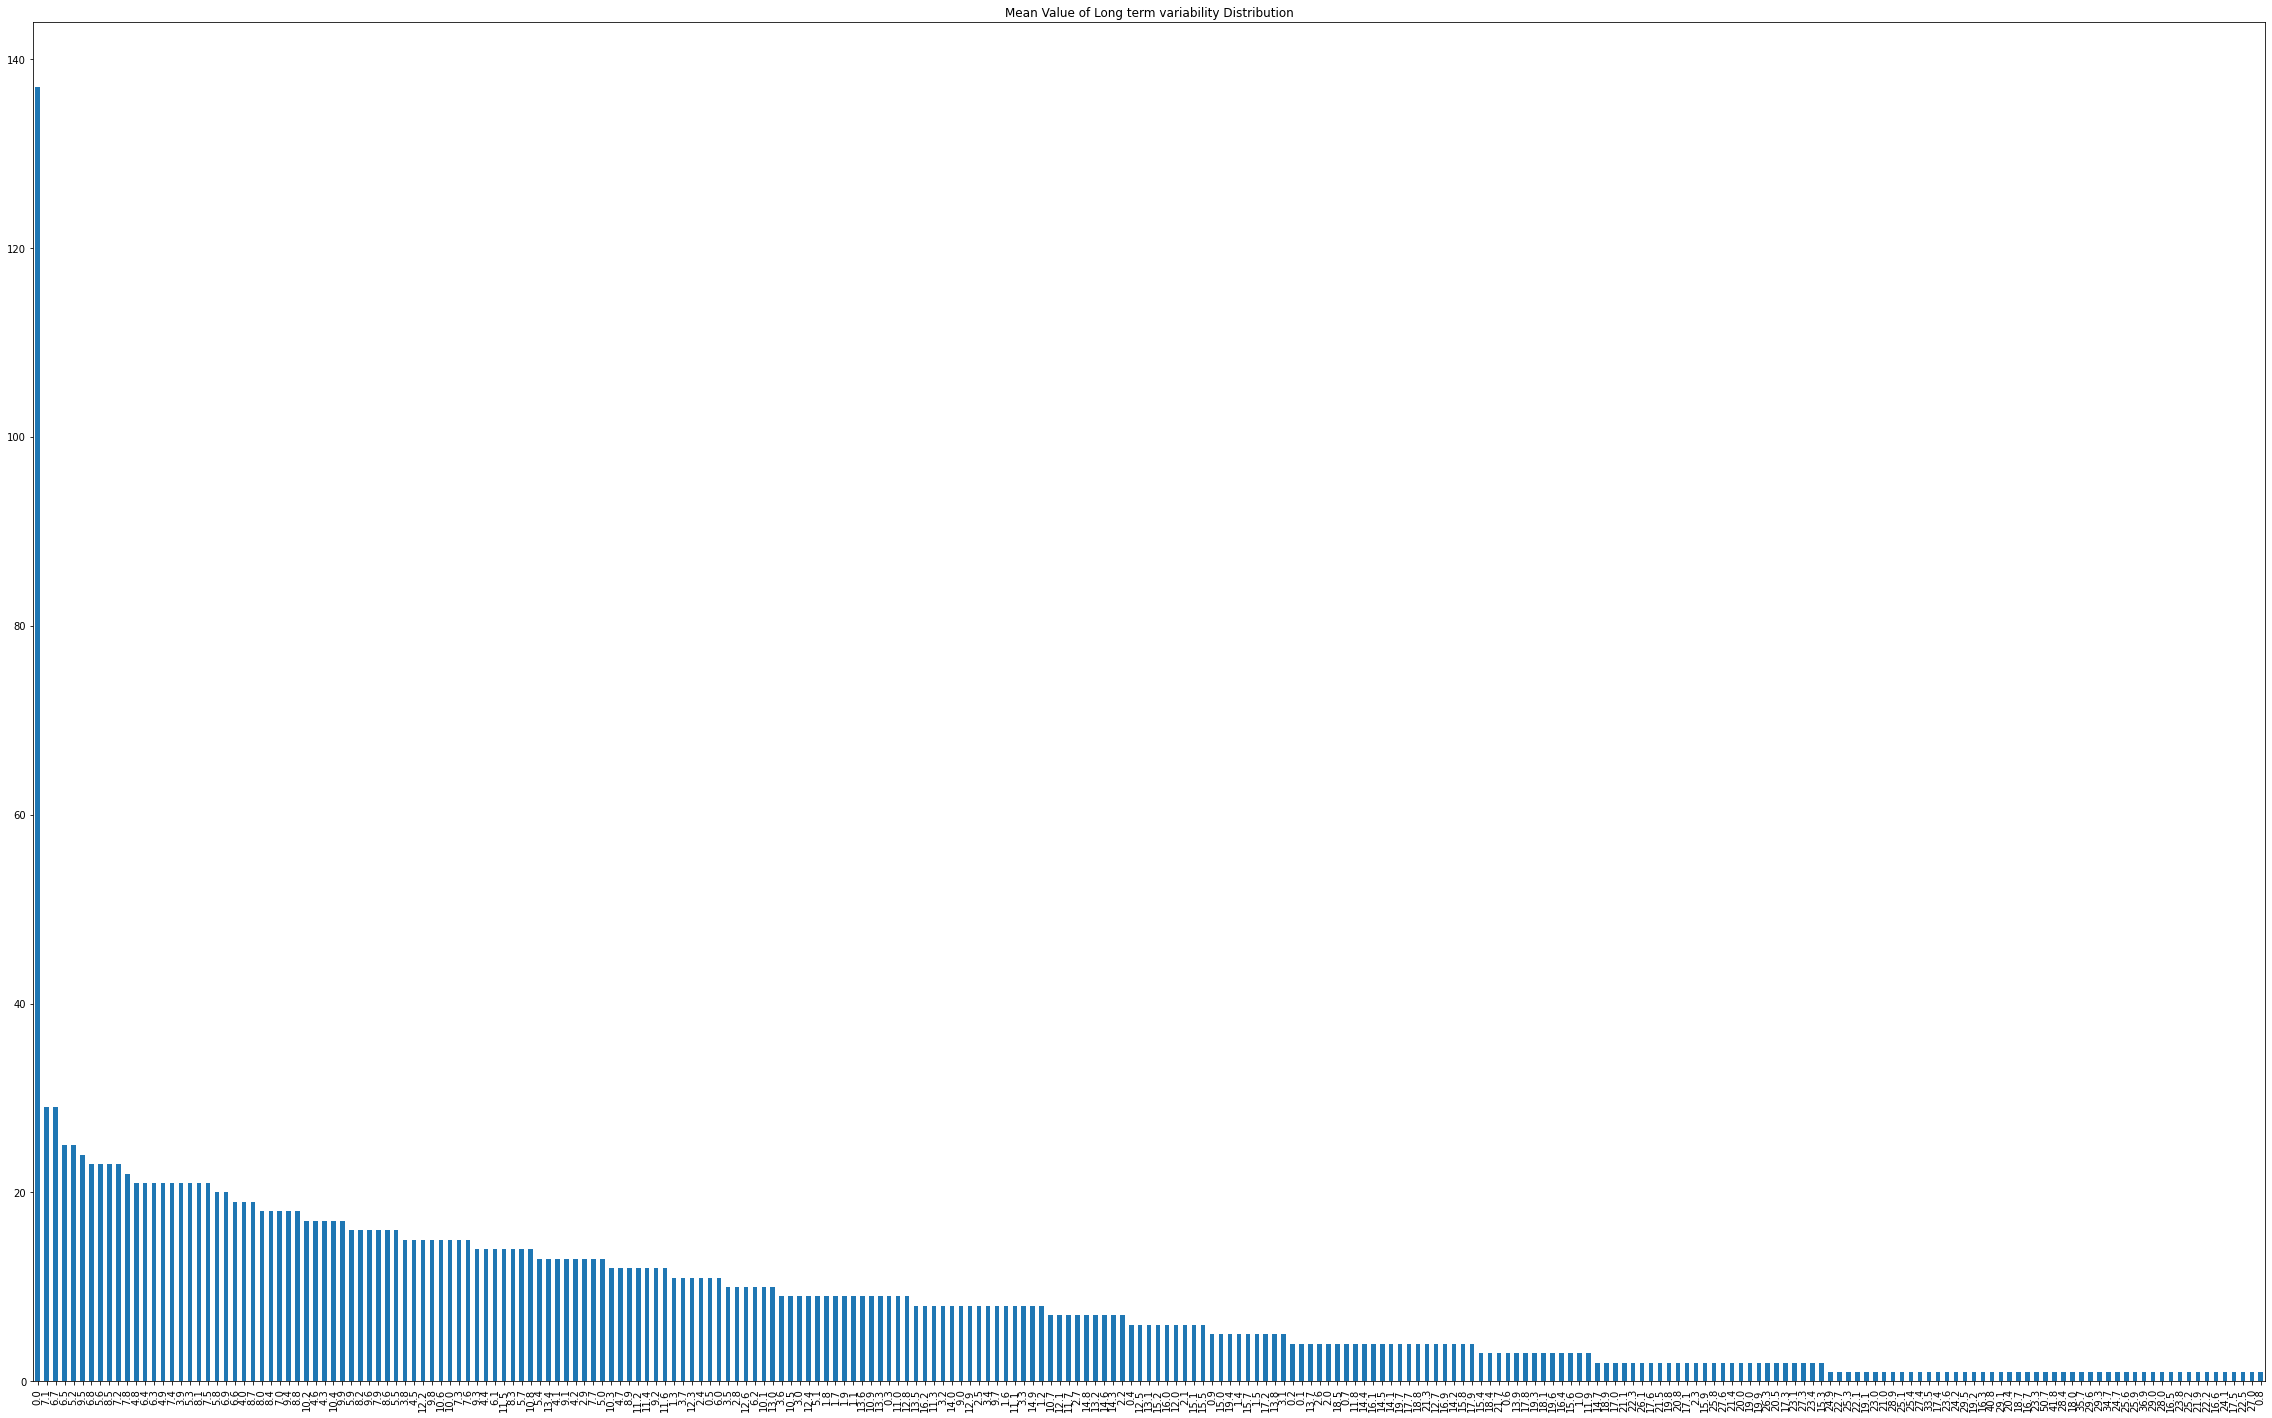

In [257]:
#Mean Value of Long term variability 
plt.figure(figsize=(40,25))
df['mean_value_of_long_term_variability'].value_counts().plot(kind='bar');
plt.title('Mean Value of Long term variability Distribution')



In [ ]:
df.boxplot(column = 'mean_value_of_long_term_variability');

Text(0.5, 1.0, 'Fetal Health Correlation Heat Map')

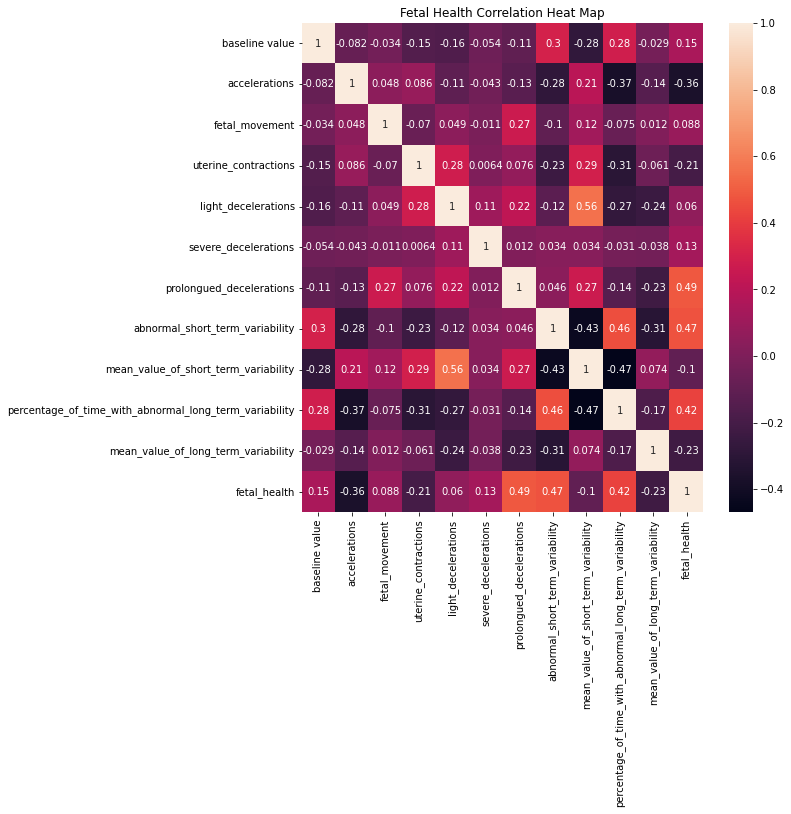

In [258]:
corr = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot = True);
plt.title('Fetal Health Correlation Heat Map')

## There are apparent correlations of fetal health with FHR accelerations and percentage of time with abnormal variability. 
## All abnormal variability measures appear correlated with fetal health measures. 
## There appear to be some correlation between uterine contractions and fetal health outcomes. 

###Machine Learning Modeling to predict Fetal Health


In [ ]:
#Preprocessing data

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [260]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [262]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [263]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [264]:

from sklearn.dummy import DummyRegressor


dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)

print('Dummy Training Scores')
eval_model(y_train, dummy.predict(X_train))

print('\n')

print('Dummy Testing Scores')
eval_model(y_test, dummy.predict(X_test))


Dummy Training Scores
MAE 0.48569820681563103,
 MSE 0.3908206911284564,
 RMSE: 0.6251565333006258,
 R^2: 0.0 


Dummy Testing Scores
MAE 0.4585636611865345,
 MSE 0.3366489485576296,
 RMSE: 0.580214571135222,
 R^2: -0.004694335096361524 


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [267]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

print('Logistic Regression Training Scores')
eval_model(y_train, log_reg.predict(X_train))

print('\n')

print('Logistic Regression Testing Scores')
eval_model(y_test, log_reg.predict(X_test))

Logistic Regression Training Scores
MAE 0.13320707070707072,
 MSE 0.1710858585858586,
 RMSE: 0.41362526347632417,
 R^2: 0.5622395065832749 


Logistic Regression Testing Scores
MAE 0.11153119092627599,
 MSE 0.13799621928166353,
 RMSE: 0.3714784237094579,
 R^2: 0.588164405767426 


{0.0001: 0.7939508506616257,
 0.001: 0.7939508506616257,
 0.01: 0.8468809073724007,
 0.1: 0.8922495274102079,
 1: 0.8941398865784499,
 10: 0.8960302457466919,
 100: 0.8960302457466919,
 1000: 0.8960302457466919}

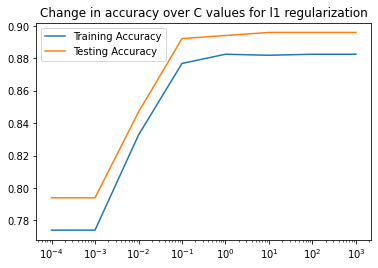

In [317]:
#Utilizing Regularization to adjust the c values and attain higher accuracy

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
 
for c in c_values:
 
  log_reg2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg2.fit(X_train, y_train)

  train_scores.append(log_reg2.score(X_train, y_train))
  test_scores.append(log_reg2.score(X_test, y_test))

#Visualize the change in c values
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 

ax.set_xscale('log')
{c:score for c, score in zip(c_values, test_scores)}

In [316]:
  log_reg3 = LogisticRegression(C=10, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg3.fit(X_train, y_train)

  print('Logistic Regression Training Scores')
eval_model(y_train, log_reg3.predict(X_train))

print('\n')

print('Logistic Regression Testing Scores')
eval_model(y_test, log_reg3.predict(X_test))

Logistic Regression Training Scores
MAE 0.13573232323232323,
 MSE 0.17234848484848486,
 RMSE: 0.41514875026728054,
 R^2: 0.559008801834812 


Logistic Regression Testing Scores
MAE 0.11909262759924386,
 MSE 0.14933837429111532,
 RMSE: 0.3864432355354604,
 R^2: 0.5543149048715981 


In [ ]:
#It appears that the regularization did not improve the logistic regression score

In [268]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print('K Nearest Neighbors Training Scores')
eval_model(y_train, knn.predict(X_train))

print('\n')

print('K Nearest Neighbors Testing Scores')
eval_model(y_test, knn.predict(X_test))

K Nearest Neighbors Training Scores
MAE 0.06755050505050506,
 MSE 0.08143939393939394,
 RMSE: 0.28537588184602064,
 R^2: 0.7916195437241419 


K Nearest Neighbors Testing Scores
MAE 0.07939508506616257,
 MSE 0.09829867674858223,
 RMSE: 0.3135261978664338,
 R^2: 0.706637658902824 


K Nearest Neighbors Model showed marked improvement with an R squared value of 70%

In [269]:
params = {'n_neighbors': range(1,20),
          'weights': ['uniform','distance'],
          'p': [2,3,4]}
          

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

knn_grid = GridSearchCV(knn, params)

knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20), 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [275]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print('KNN train accuracy:', accuracy_score(y_train, knn_train_preds))
print('\n')
print('KNN test accuracy:', accuracy_score(y_test, knn_test_preds))

KNN train accuracy: 0.9393939393939394


KNN test accuracy: 0.9300567107750473


In [271]:
knn_grid.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [276]:
best_knn = knn_grid.best_estimator_

best_knn_train_preds = best_knn.predict(X_train)
best_knn_test_preds = best_knn.predict(X_test)
print('Best Model KNN Train Metrics')
print(classification_report(y_train, knn_train_preds))
print('\nBest Model KNN Test Metrics')
print(classification_report(y_test, knn_test_preds))

Best Model KNN Train Metrics
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97      1226
         2.0       0.83      0.78      0.80       219
         3.0       0.94      0.88      0.91       139

    accuracy                           0.94      1584
   macro avg       0.91      0.88      0.89      1584
weighted avg       0.94      0.94      0.94      1584


Best Model KNN Test Metrics
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       420
         2.0       0.84      0.70      0.76        73
         3.0       0.91      0.89      0.90        36

    accuracy                           0.93       529
   macro avg       0.90      0.85      0.87       529
weighted avg       0.93      0.93      0.93       529



In [277]:
print('Best KNN Hypertuned Training Scores')
eval_model(y_train, best_knn.predict(X_train))

print('\n')

print('Best KNN Hypertuned Testing Scores')
eval_model(y_test, best_knn.predict(X_test))

Best KNN Hypertuned Training Scores
MAE 0.0006313131313131314,
 MSE 0.0006313131313131314,
 RMSE: 0.025125945381480302,
 R^2: 0.9983846476257685 


Best KNN Hypertuned Testing Scores
MAE 0.06994328922495274,
 MSE 0.08128544423440454,
 RMSE: 0.28510602279573916,
 R^2: 0.757411910246566 


In [273]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print('Random Forest Classifier Training Scores')
eval_model(y_train, rf.predict(X_train))

print('\n')

print('Random Forest Classifier Testing Scores')
eval_model(y_test, rf.predict(X_test))

Random Forest Classifier Training Scores
MAE 0.0006313131313131314,
 MSE 0.0006313131313131314,
 RMSE: 0.025125945381480302,
 R^2: 0.9983846476257685 


Random Forest Classifier Testing Scores
MAE 0.052930056710775046,
 MSE 0.06049149338374291,
 RMSE: 0.24595018476053826,
 R^2: 0.819469328555584 


#Decision Tree Model



In [282]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42)

dec_tree.fit(X_train, y_train)

print('Decision Tree Classifier Training Scores')
eval_model(y_train, dec_tree.predict(X_train))

print('\n')

print('Decision Tree Classifier Testing Scores')
eval_model(y_test, dec_tree.predict(X_test))

Decision Tree Classifier Training Scores
MAE 0.0006313131313131314,
 MSE 0.0006313131313131314,
 RMSE: 0.025125945381480302,
 R^2: 0.9983846476257685 


Decision Tree Classifier Testing Scores
MAE 0.0945179584120983,
 MSE 0.12476370510396975,
 RMSE: 0.3532190610711287,
 R^2: 0.627655490145892 


In [283]:
dec_tree.get_depth()

15

In [284]:
dec_tree.get_n_leaves()

130

In [292]:
dec_tree_2 = DecisionTreeClassifier(max_depth = 15, random_state = 42)
dec_tree_2.fit(X_train, y_train)

print('Decision Tree Classifier 2 Training Scores')
eval_model(y_train, dec_tree_2.predict(X_train))

print('\n')

print('Decision Tree Classifier 2 Testing Scores')
eval_model(y_test, dec_tree_2.predict(X_test))

Decision Tree Classifier 2 Training Scores
MAE 0.0006313131313131314,
 MSE 0.0006313131313131314,
 RMSE: 0.025125945381480302,
 R^2: 0.9983846476257685 


Decision Tree Classifier 2 Testing Scores
MAE 0.0945179584120983,
 MSE 0.12476370510396975,
 RMSE: 0.3532190610711287,
 R^2: 0.627655490145892 


In [297]:
max_depth_range = list(range(2, 20))
r2 = []
for depth in max_depth_range:
    dec_tree_3 = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree_3.fit(X_train, y_train)
    score = dec_tree_3.score(X_test, y_test)
    r2.append(score)

    

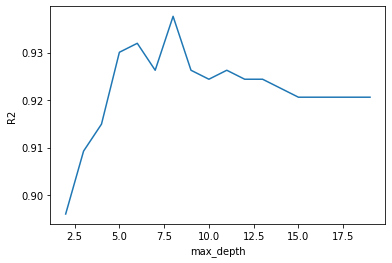

In [298]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [300]:
dec_tree_3 = DecisionTreeClassifier(max_depth = 8, random_state = 42)
dec_tree_3.fit(X_train, y_train)

print('Decision Tree Classifier 2 Training Scores')
eval_model(y_train, dec_tree_3.predict(X_train))

print('\n')

print('Decision Tree Classifier 2 Testing Scores')
eval_model(y_test, dec_tree_3.predict(X_test))

Decision Tree Classifier 2 Training Scores
MAE 0.04040404040404041,
 MSE 0.047979797979797977,
 RMSE: 0.2190429135575903,
 R^2: 0.8772332195584092 


Decision Tree Classifier 2 Testing Scores
MAE 0.08128544423440454,
 MSE 0.11909262759924386,
 RMSE: 0.34509799709538136,
 R^2: 0.644580240593806 


#Light GBM Model


In [303]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

print('Light GBM Boosted Training Scores')
eval_model(y_train, lgbm.predict(X_train))

print('\n')

print('Light GBM Boosted Testing Scores')
eval_model(y_test, lgbm.predict(X_test))

Light GBM Boosted Training Scores
MAE 0.0006313131313131314,
 MSE 0.0006313131313131314,
 RMSE: 0.025125945381480302,
 R^2: 0.9983846476257685 


Light GBM Boosted Testing Scores
MAE 0.054820415879017016,
 MSE 0.062381852551984876,
 RMSE: 0.24976359332774037,
 R^2: 0.813827745072946 


In [304]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

print('XG Boosted Training Scores')
eval_model(y_train, xgb.predict(X_train))

print('\n')

print('XG Boosted Testing Scores')
eval_model(y_test, xgb.predict(X_test))

XG Boosted Training Scores
MAE 0.0422979797979798,
 MSE 0.04734848484848485,
 RMSE: 0.2175970699446223,
 R^2: 0.8788485719326407 


XG Boosted Testing Scores
MAE 0.052930056710775046,
 MSE 0.06805293005671077,
 RMSE: 0.2608695652173913,
 R^2: 0.796902994625032 


###The highest accuracy models were Random Forest Classifier and Light GBM, producing similar results with 81-82% r2 values. 

#Random Forest Classifer will be the selected model to continue the predictive process for its ease of use and ease of hypertuning in future calculations.